In [42]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

from sklearn.metrics import roc_auc_score, roc_curve, auc

import rnn

In [ ]:
from os import environ

In [14]:
def flexroc(fname):
    
    """
    
    """
    
    FLEXROC = '/home/yhuang10/Spatio-Temporal/cynet_/bin/flexroc '
    
    RES = {}
    
    h = np.array(fname.split('/')[-1].split('_')[0].split('#')).astype(float)
    RES['lat1'], RES['lat2'], RES['lon1'], RES['lon2'] = h 
    df = pd.read_csv(fname)

    df[['AR_grt','AR_prd']].to_csv('tmp.csv', header=None, index=None, sep=' ')

    result = ! $FLEXROC -i tmp.csv -w 1 -x 0 -t 0.8 -f 0.2 -E 0 -C 1 -L 1
    RES['VAR'] = float(result[0].split()[1])
    
    df[['AS_grt','AS_prd']].to_csv('tmp.csv', header=None, index=None, sep=' ')
    result = ! $FLEXROC -i tmp.csv -w 1 -x 0 -t 0.8 -f 0.2 -E 0 -C 1 -L 1
    RES['HOMICIDE-ASSAULT-BATTERY'] = float(result[0].split()[1])
    
    df[['PR_grt','PR_prd']].to_csv('tmp.csv',header=None,index=None,sep=' ')
    result = ! $FLEXROC -i tmp.csv -w 1 -x 0 -t 0.8 -f 0.2 -E 0 -C 1 -L 1
    RES['BURGLARY-THEFT-MOTOR_VEHICLE_THEFT'] = float(result[0].split()[1])

    ! rm tmp.csv
    
    return RES

In [2]:
meta = pd.read_csv('../data/meta.csv', index_col=0)
X_raw = np.genfromtxt('../data/CRIME-_2014-01-01_2016-12-31.csv')

In [3]:
random = [ 
    298, 304, 908, 1176, 453,  
    281, 947, 203, 1443, 159,
    870, 109, 103, 1206, 1084, 
    615, 1013, 324, 470, 901,
    1025, 260, 1106, 551, 82, 
    903, 1137, 1477, 210, 388,
    824, 270,  595, 269, 454,
    291, 637, 930, 292, 360,
    832, 29, 320, 498, 1181, 
    1352, 732, 1164, 488, 1124]

## Average Performance:
Test the performance of (deep) RNN with horizon=$7$ on the $50$ blocks.

Arrest: 1293,
Property: 3632,
Assault: 5673.
Training data: input dim = (1, 723, 6165), output dim = (1, 723, 3)
Out-sample data: input dim = (1, 366, 6165), output dim = (1, 366, 3)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, None, 500)         13332000  
_________________________________________________________________
lstm_14 (LSTM)               (None, None, 100)         240400    
_________________________________________________________________
lstm_15 (LSTM)               (None, None, 10)          4440      
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 3)           33        
Total params: 13,576,873
Trainable params: 13,576,873
Non-trainable params: 0
_________________________________________________________________
Train on 1 samples
Epoch 1/200
1/1 [=====================

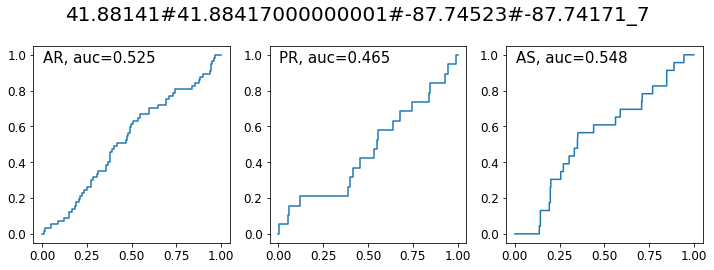

Arrest: 356,
Property: 2695,
Assault: 4947.
Training data: input dim = (1, 723, 6165), output dim = (1, 723, 3)
Out-sample data: input dim = (1, 366, 6165), output dim = (1, 366, 3)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, None, 500)         13332000  
_________________________________________________________________
lstm_17 (LSTM)               (None, None, 100)         240400    
_________________________________________________________________
lstm_18 (LSTM)               (None, None, 10)          4440      
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 3)           33        
Total params: 13,576,873
Trainable params: 13,576,873
Non-trainable params: 0
_________________________________________________________________
Train on 1 samples
Epoch 1/200
1/1 [======================

In [ ]:
i = int(environ['i'])
center = meta.index[i]
tile = meta.loc[center, ['lat1', 'lat2','lon1', 'lon2']]

X_train, Y_train, X_test, Y_test = rnn.getData(meta, X_raw, center, 7)

model = rnn.train_3(X_train, Y_train, epochs=200)
prediction = model.predict(X_test)
    
figTitle = 'results/random_500-100-10_200/' + '#'.join(map(str, tile.values)) + '_{}'.format(future)
dfName = figTitle + '.rnnres'
rnn.Analysis(Y_test, prediction, figTitle, dfName)